In [1]:
# Biz bu yerda o'zi yurar avtomobillar uchun SEMANTIC SEGMENTATION yordamida
# ko'chalarda daraxtlarni,avtomobillarni,uylarni va boshqa narsalarni alohida
# ranglarda ajratib olish ko'rib chiqdik

In [2]:
import numpy as np
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

2.2.2+cu118
2.8.1


In [3]:
from fastai.vision.all import *
path=untar_data(URLs.CAMVID_TINY)

In [4]:
path.ls()

(#3) [Path('C:/Users/user/.fastai/data/camvid_tiny/codes.txt'),Path('C:/Users/user/.fastai/data/camvid_tiny/images'),Path('C:/Users/user/.fastai/data/camvid_tiny/labels')]

In [5]:
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

In [7]:
# data loader
dls=SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),
                                            label_func=label_getter,
                                            codes=np.loadtxt(path/'codes.txt',dtype=str))

In [8]:
# fine tuning
learn=unet_learner(dls,resnet34)
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,3.086445,2.228528,00:05


epoch,train_loss,valid_loss,time
0,1.741222,1.652550,00:01
1,1.550875,1.471184,00:01
2,1.393687,1.319897,00:01
3,1.265586,1.027483,00:01
4,1.190604,1.064313,00:02
5,1.089934,0.928351,00:01
6,0.987930,0.853524,00:01
7,0.900749,0.824610,00:01
8,0.827364,0.826808,00:02
9,0.764833,0.821350,00:02


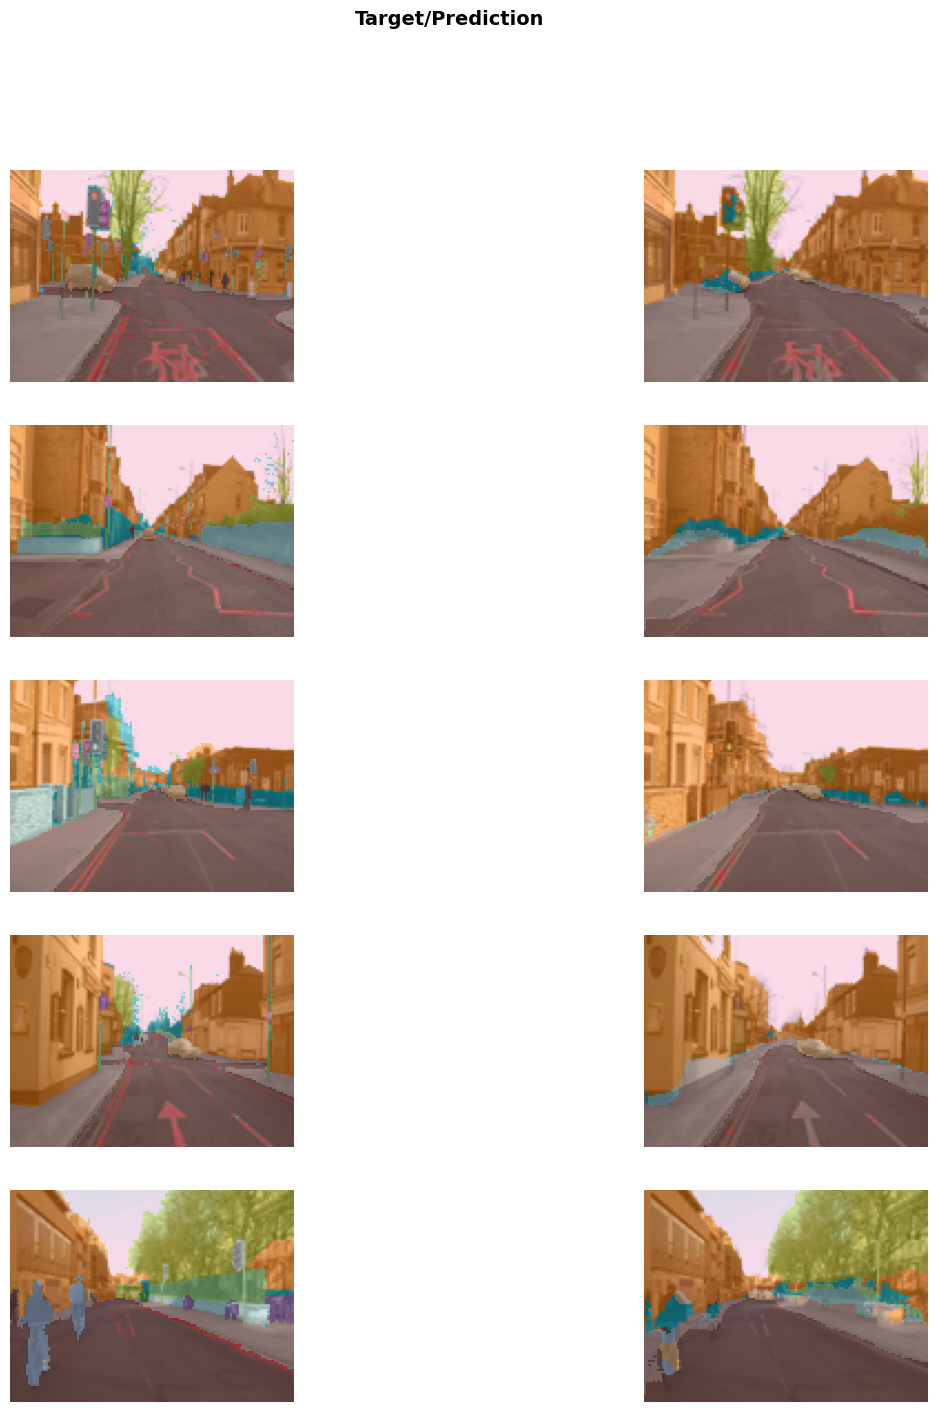

In [9]:
learn.show_results(max_n=5,figsize=(15,16))